In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [27]:
# Carregar os dados do Excel
df = pd.read_excel("dados_participantes_experimento.xlsx")

In [28]:
"""
# Estatísticas descritivas
print("Estatísticas Descritivas Gerais:")
print(df.describe())
"""

'\n# Estatísticas descritivas\nprint("Estatísticas Descritivas Gerais:")\nprint(df.describe())\n'

In [29]:

# Estatísticas descritivas por grupo
print("\nEstatísticas Descritivas por Grupo:")
print(df.groupby("Grupo")["Defeitos Encontrados"].describe())



Estatísticas Descritivas por Grupo:
          count  mean       std  min  25%   50%    75%   max
Grupo                                                       
Defeitos   10.0   5.9  2.726414  1.0  4.0   7.0   7.75   9.0
SPLIT      10.0  10.0  1.699673  8.0  8.5  10.0  10.75  13.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

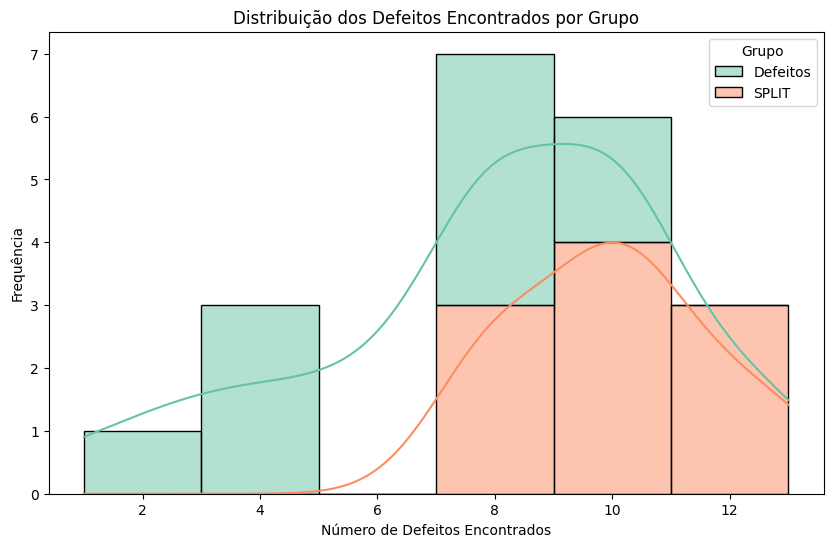

In [30]:
# Histograma dos defeitos encontrados
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Defeitos Encontrados", hue="Grupo", kde=True, palette="Set2", multiple="stack")
plt.title("Distribuição dos Defeitos Encontrados por Grupo")
plt.xlabel("Número de Defeitos Encontrados")
plt.ylabel("Frequência")
plt.show()

In [31]:
# Teste de normalidade (Shapiro-Wilk)
def teste_normalidade(data):
    stat, p = stats.shapiro(data)
    print(f'Estatística do teste: {stat:.4f}, valor-p: {p:.4f}')
    if p > 0.05:
        print("Distribuição normal")
    else:
        print("Distribuição não normal")

print("\nTeste de Normalidade para o Grupo 'Defeitos':")
teste_normalidade(df[df['Grupo'] == 'Defeitos']['Defeitos Encontrados'])

print("\nTeste de Normalidade para o Grupo 'SPLIT':")
teste_normalidade(df[df['Grupo'] == 'SPLIT']['Defeitos Encontrados'])


Teste de Normalidade para o Grupo 'Defeitos':
Estatística do teste: 0.9069, valor-p: 0.2605
Distribuição normal

Teste de Normalidade para o Grupo 'SPLIT':
Estatística do teste: 0.8963, valor-p: 0.1996
Distribuição normal


In [32]:
# Teste Mann-Whitney
grupo_defeitos = df[df['Grupo'] == 'Defeitos']['Defeitos Encontrados']
grupo_split = df[df['Grupo'] == 'SPLIT']['Defeitos Encontrados']

stat, p = stats.mannwhitneyu(grupo_defeitos, grupo_split)

print(f"\nResultado do teste Mann-Whitney U:\nEstatística U: {stat:.4f}, valor-p: {p:.4f}")
if p < 0.05:
    print("Diferença significativa entre os grupos.")
else:
    print("Não há diferença significativa entre os grupos.")


Resultado do teste Mann-Whitney U:
Estatística U: 7.5000, valor-p: 0.0013
Diferença significativa entre os grupos.


<ipython-input-33-cae4c35489e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Defeitos Encontrados", data=df, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_g

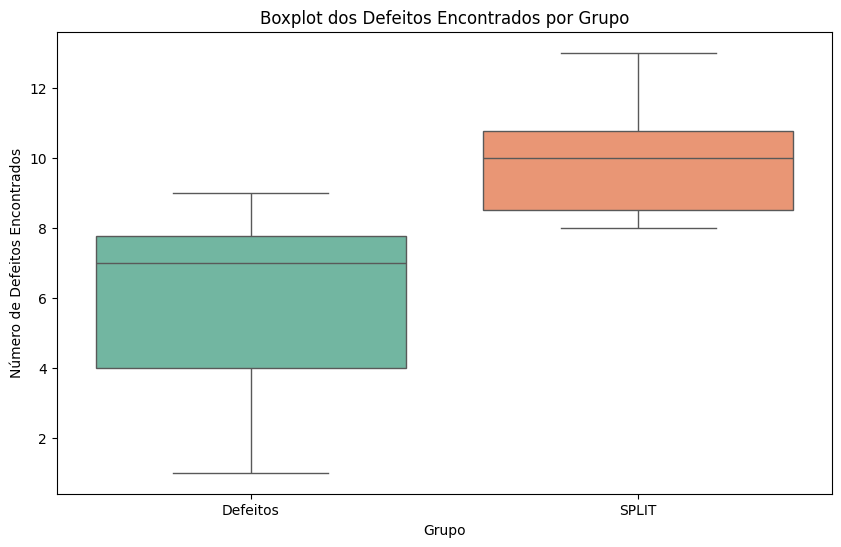

In [33]:
# Boxplot comparando os grupos
plt.figure(figsize=(10, 6))
sns.boxplot(x="Grupo", y="Defeitos Encontrados", data=df, palette="Set2")
plt.title("Boxplot dos Defeitos Encontrados por Grupo")
plt.xlabel("Grupo")
plt.ylabel("Número de Defeitos Encontrados")
plt.show()


<ipython-input-34-ede6d2c11959>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Grupo", y="Defeitos Encontrados", data=df, palette=palette, order=["Defeitos", "SPLIT"])
<ipython-input-34-ede6d2c11959>:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x="Grupo", y="Defeitos Encontrados", data=df, palette=palette, order=["Defeitos", "SPLIT"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

Text(92.09722222222221, 0.5, 'Número de Defeitos Encontrados')

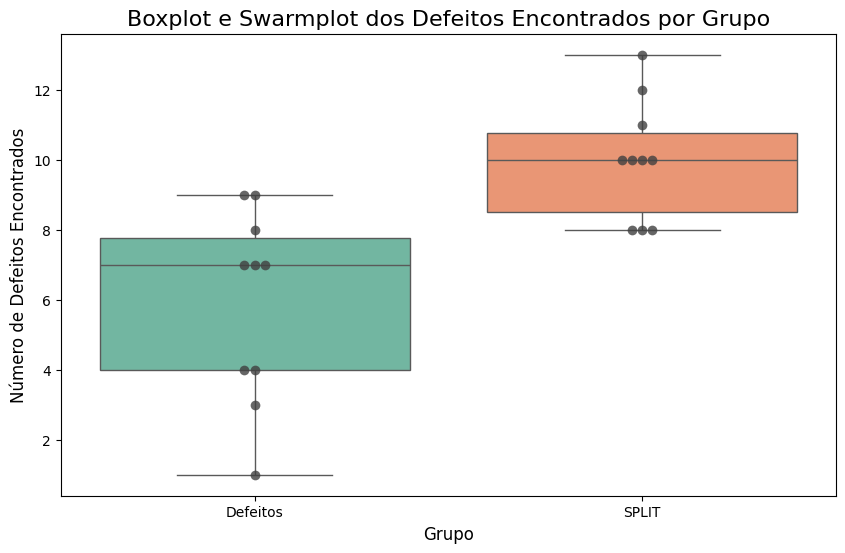

In [34]:
# Boxplot com Swarmplot sobreposto
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")
sns.boxplot(x="Grupo", y="Defeitos Encontrados", data=df, palette=palette, order=["Defeitos", "SPLIT"])
sns.swarmplot(x="Grupo", y="Defeitos Encontrados", data=df, color=".25", order=["Defeitos", "SPLIT"], size=7, alpha=0.8)
plt.title("Boxplot e Swarmplot dos Defeitos Encontrados por Grupo", fontsize=16)
plt.xlabel("Grupo", fontsize=12)
plt.ylabel("Número de Defeitos Encontrados", fontsize=12)